## Energislösarna Frankrike!  
i denna notebook ska frankrikes energislösning undersökas från år 2015 - 2020

In [130]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from statsmodels.tsa.seasonal import seasonal_decompose

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('fr.csv')
df.head()

,start,end,load
0,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+00:00,70929.0
1,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+00:00,69773.0
2,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+00:00,66417.0
3,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+00:00,64182.0
4,2015-01-01 04:00:00+00:00,2015-01-01 05:00:00+00:00,63859.0


In [132]:
df.tail()

,start,end,load
48865,2020-07-31 19:00:00+00:00,2020-07-31 20:00:00+00:00,46001.0
48866,2020-07-31 20:00:00+00:00,2020-07-31 21:00:00+00:00,47535.0
48867,2020-07-31 21:00:00+00:00,2020-07-31 22:00:00+00:00,47322.0
48868,2020-07-31 22:00:00+00:00,2020-07-31 23:00:00+00:00,42805.0
48869,2020-07-31 23:00:00+00:00,2020-08-01 00:00:00+00:00,40019.0


In [133]:
df.describe()

,load
count,48870.000000
mean,53556.308267
std,11682.584881
min,29398.000000
25%,44616.000000
50%,51932.000000
75%,61629.750000
max,158000.000000


array([[<Axes: title={'center': 'load'}>]], dtype=object)

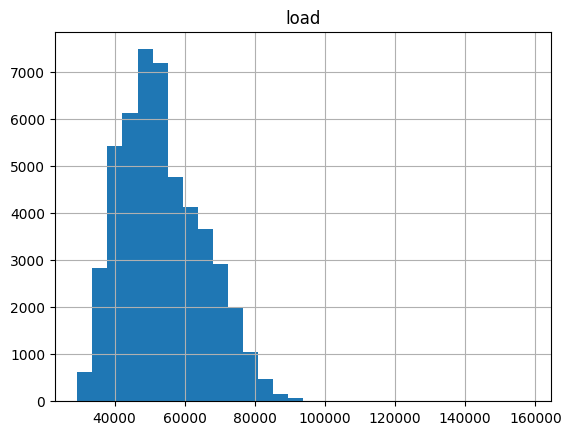

In [134]:
df.hist(bins=30)

In [135]:
df['start']= pd.to_datetime(df['start'])
df['end']= pd.to_datetime(df['end'])

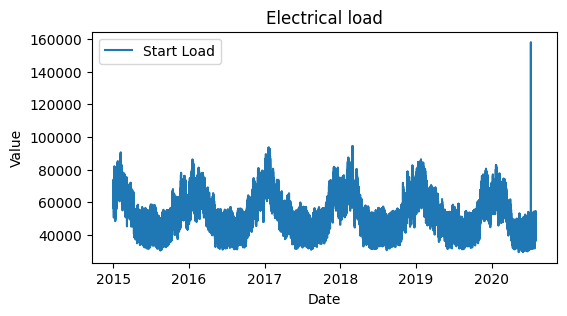

In [136]:
plt.figure(figsize=(6, 3))
plt.plot(df['start'], df['load'], label='Start Load')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Electrical load')
plt.legend()
plt.show()

skapar en "tidsmodell"

In [137]:
dates = pd.date_range(start='2015-01-01', periods=67, freq='ME')
data = np.random.normal(loc=0.5, scale=2, size=67).cumsum() + 10 * np.sin(np.linspace(0, 20, 67))
df = pd.DataFrame(data, index=dates, columns=['load'])

Multiplicative modellen fungerade ej pga 0 och negativ värden, what?

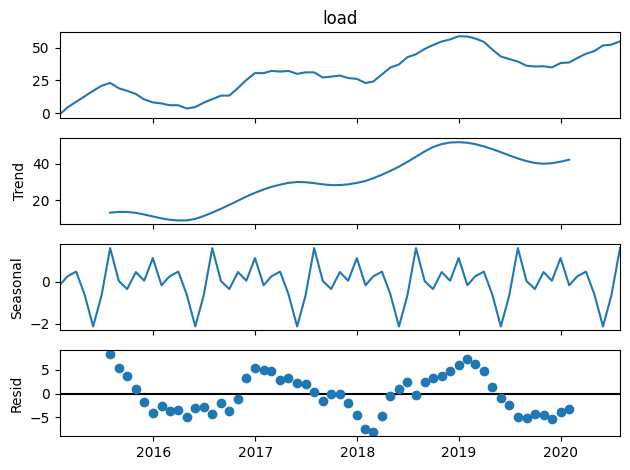

In [138]:
# Utför en säsongsmässig dekomposition
result = seasonal_decompose(df['load'], model='additive')
# result = seasonal_decompose(df['load'], model='multiplicative')

# Plotta dekompositionsresultatet
result.plot()
plt.show()

gör om dataframen så att man kan träna prohet modellen

In [139]:
df = pd.DataFrame({
  'ds': pd.date_range(start='2020-08-01', periods=60, freq='ME'), #datestamp
  'y': (0.05 * np.arange(60) + np.random.normal(size=60) + [np.sin((x*np.pi)/4) for x in range(60)]) 
})

11:47:23 - cmdstanpy - INFO - Chain [1] start processing


11:47:23 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


           ds      yhat  yhat_lower  yhat_upper
57 2025-05-31  2.535804    1.077744    4.082340
58 2025-06-30  2.609693    1.198915    4.146342
59 2025-07-31  3.085475    1.632988    4.628855
60 2025-08-31  2.465446    0.997444    3.859606
61 2025-09-30  3.465494    2.118596    4.906775


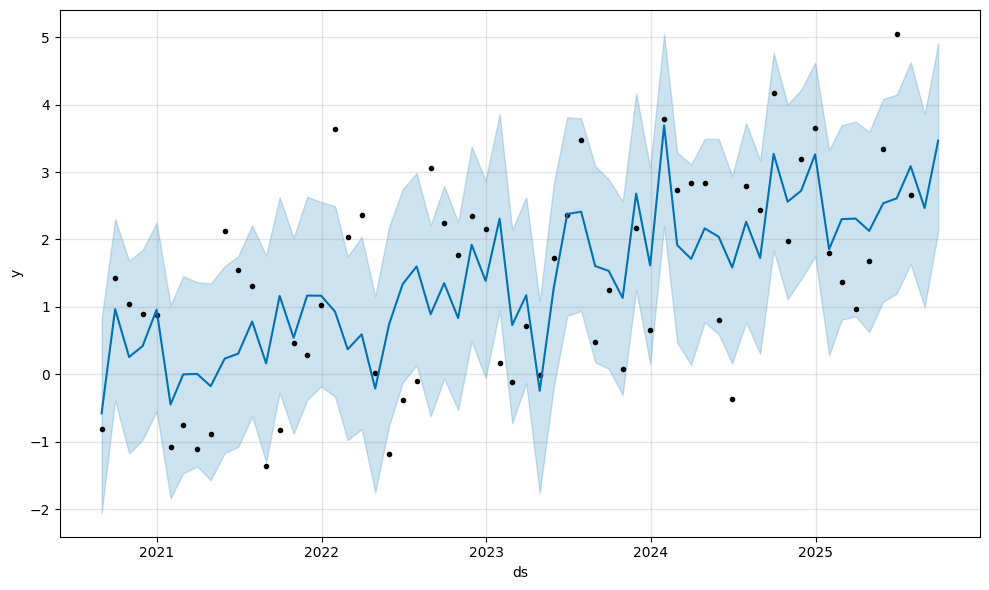

In [142]:
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=2, freq='ME')

forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

model.plot(forecast)
import matplotlib.pyplot as plt
plt.show()